In [2]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
result_file_directory = "../results/experiment2 20240822-1537.csv"
df = pd.read_csv(result_file_directory)
unique_data = df['Data'].unique()

# Loop through each unique value and create a table for each
for data_value in unique_data:
    # Filter the DataFrame for the current data value
    filtered_df = df[df['Data'] == data_value][['Method', 'MSE']]
    display(HTML(f"<h5>Table for {data_value}</h5>"))
    display(HTML(f"{filtered_df.to_html(index=False)}"))

Method,MSE
mean,0.019
randomized,0.026
random_selection,0.039
sequential reconcile,0.026


Method,MSE
mode,0.238
randomized,0.233
random_selection,0.253
sequential reconcile,0.216


Method,MSE
mode,0.136
randomized,0.138
random_selection,0.119
sequential reconcile,0.124


/var/folders/v_/d3hz__gx7y9ffy_rls7zbjpm0000gn/T/ipykernel_27929/2040291509.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Method', y='MSE', data=df_subset, ax=ax, palette=palette)
/var/folders/v_/d3hz__gx7y9ffy_rls7zbjpm0000gn/T/ipykernel_27929/2040291509.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Method', y='MSE', data=df_subset, ax=ax, palette=palette)
/var/folders/v_/d3hz__gx7y9ffy_rls7zbjpm0000gn/T/ipykernel_27929/2040291509.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Method', y='MSE', data=df_subset, a

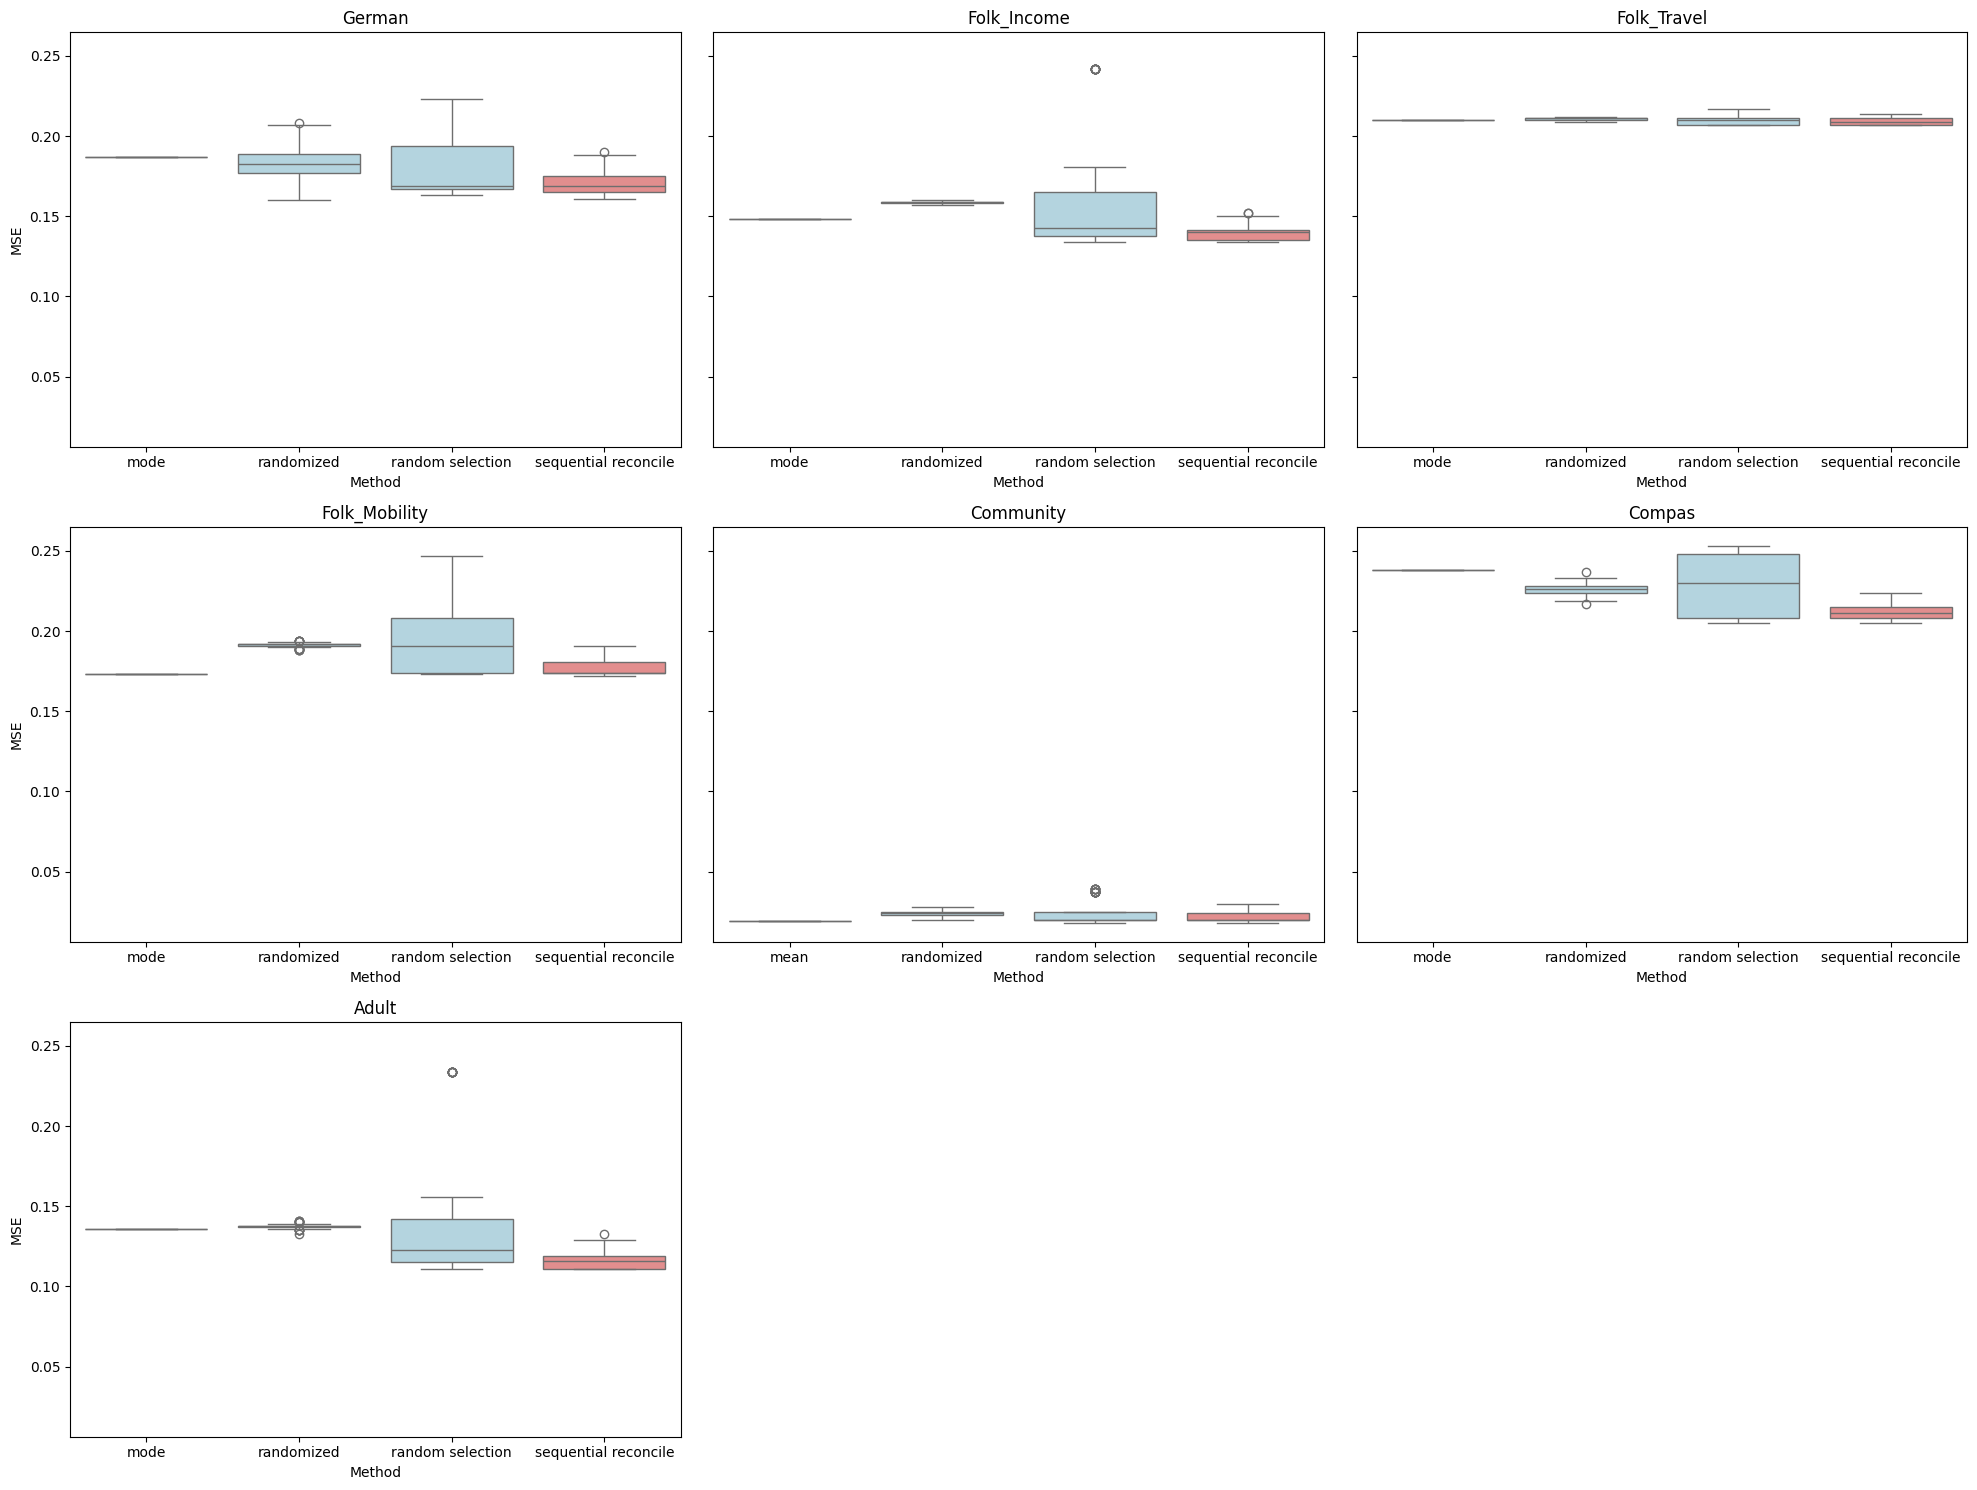

In [12]:
datasets = df['Data'].unique()
methods = df['Method'].unique()

# Set up the figure and subplots: 7 subplots for 7 datasets (arranged in a grid, e.g., 2 rows and 4 columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharey=True)  # 2x4 grid (with 8 subplots, 7 for data + 1 empty)
axes = axes.flatten()  # Flatten the axes for easier iteration
palette = {
    'sequential reconcile': 'lightcoral',  # Custom color for 'sequential reconcile'
    'mode': 'lightblue',
    'mean': 'lightblue', # Default color for other methods
    'randomized': 'lightblue',
    'random selection': 'lightblue'
    # Add any other method names here
}

# Loop over each dataset and plot the corresponding boxplots
for i, dataset in enumerate(datasets):
    ax = axes[i]
    
    # Filter the dataframe for the current dataset
    df_subset = df[df['Data'] == dataset]
    
    # Plot the boxplots using seaborn
    sns.boxplot(x='Method', y='MSE', data=df_subset, ax=ax, palette=palette)
    
    # Set the title for each subplot
    ax.set_title(f'{dataset}')
    
    # Set labels for each subplot
    ax.set_xlabel('Method')
    ax.set_ylabel('MSE')

# Turn off the 8th (extra) subplot, as we only need 7
if len(axes) > len(datasets):
    fig.delaxes(axes[-1])
    fig.delaxes(axes[-2])# This removes the 8th axis

# Adjust layout to fit everything nicely
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools

# Assuming df is your DataFrame with columns 'method' and 'MSE'
methods = df['Method'].unique()

# Initialize dictionary to store results
confidence_level = 0.95

# Initialize a list to store the results for table creation
pairwise_results = []

# Iterate over pairwise comparisons between 'sequential reconcile' and each other method
for method in methods:
    if method != 'sequential reconcile':
        # Filter MSE values for "sequential reconcile" and the current method
        mse_sequential = df[df['Method'] == 'sequential reconcile']['MSE']
        mse_method = df[df['Method'] == method]['MSE']
        
        # Perform a two-sided t-test (since we are computing confidence intervals)
        t_stat, p_value = stats.ttest_ind(mse_sequential, mse_method)
        
        # Calculate the difference in means
        mean_diff = np.mean(mse_sequential) - np.mean(mse_method)
        
        # Calculate the standard error of the difference in means
        se_diff = np.sqrt(np.var(mse_sequential, ddof=1) / len(mse_sequential) + 
                          np.var(mse_method, ddof=1) / len(mse_method))
        
        # Get the degrees of freedom
        dof = len(mse_sequential) + len(mse_method) - 2
        
        # Find the critical t-value for the confidence level
        t_critical = stats.t.ppf((1 + confidence_level) / 2, df=dof)
        
        # Calculate the margin of error
        margin_of_error = t_critical * se_diff
        
        # Calculate the confidence interval
        ci_lower = mean_diff - margin_of_error
        ci_upper = mean_diff + margin_of_error
        
        # Store the results in a dictionary for table creation
        pairwise_results.append({
            'Method Compared': method,
            'T-statistic': t_stat,
            'P-value': p_value,
            'Mean Difference': mean_diff,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })

# Convert results to a pandas DataFrame for table format
results_df = pd.DataFrame(pairwise_results)

# Display the table in Jupyter
display(results_df)

/Users/tina/Documents/StonyBrook/research/Reconciliation-Project/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Method Compared,T-statistic,P-value,Mean Difference,CI Lower,CI Upper
0,mode,-11.478008,4.095153e-29,-0.032533,-0.037878,-0.027187
1,randomized,-3.666975,2.546384e-04,-0.012184,-0.018702,-0.005666
2,random selection,-3.537114,4.177523e-04,-0.012177,-0.018931,-0.005424
3,mean,21.221507,1.354744e-79,0.130467,0.125908,0.135026
